# Get acoustic measures from production task

Input txt files from Voicesauce and clean.
* All cleaned TextGrids should be saved in textgrids folder
* output.txt file should contain output from voicesauce run over all wav files and cleaned Textgrids with tier number 3, and number of subsegments set to 1

In [1]:
import pandas as pd
import os
from audiolabel import read_label
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import factor_analyzer as fa # factor analysis algorithm

In [2]:
df_4 = pd.read_csv("voicesauce_txt/output_LPC4.txt", sep = "\t")
df_4.head()

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,shrF0_mean,sF1_mean,sF2_mean,sF3_mean,sF4_mean,pF1_mean,pF2_mean,pF3_mean,pF4_mean,Unnamed: 45
0,afs116_catala_exp2_a.mat,i,5808.263,5880.0,0.000,0.000,0.000,0.000,0.000,0.000,...,215.573,370.632,1022.064,2757.576,3710.802,841.155,2768.201,4036.461,4219.764,NaN
1,afs116_catala_exp2_a.mat,a,5974.435,6249.1,10.511,2.333,10.185,-12.022,5.514,2.974,...,250.642,599.884,1252.682,1647.339,3698.479,1041.290,1572.536,3588.091,4465.044,NaN
2,afs116_catala_exp2_a.mat,i,11426.143,11540.6,12.054,11.128,11.402,-9.519,1.819,26.349,...,208.054,329.584,1041.040,3249.417,4219.348,946.664,3353.907,4362.954,0.000,NaN
3,afs116_catala_exp2_a.mat,a,11790.600,12090.6,10.516,2.929,6.733,-13.412,2.009,3.168,...,260.936,626.387,1297.339,2301.141,3933.510,966.891,1574.426,3477.352,4437.865,NaN
4,afs116_catala_exp2_a.mat,i,41302.182,41500.2,12.355,7.137,11.799,-3.304,-0.731,22.468,...,216.376,369.904,1050.428,3358.187,4359.227,940.577,3371.857,4444.714,4604.958,NaN


In [3]:
df_5 = pd.read_csv("voicesauce_txt/output_LPC5.txt", sep = "\t")
df_6 = pd.read_csv("voicesauce_txt/output_LPC6.txt", sep = "\t")
df_5_fixed = pd.read_csv("voicesauce_txt/output_mistakes5.txt", sep = "\t")
df_5_odd = pd.read_csv("voicesauce_txt/output_mistakes_odd_5.txt", sep = "\t")
df_6_odd = pd.read_csv("voicesauce_txt/output_mistakes_odd_6.txt", sep = "\t")

In [4]:
print(len(df_5))
df_5 = df_5[(df_5['Filename']!='ala054_catala_exp2_d.mat') &
           (df_5['Filename']!='ala054_spanish_exp2_a.mat') &
           (df_5['Filename']!='aps124_spanish_exp2_b.mat')].copy()
df_5.reset_index(inplace = True, drop = True)
len(df_5)

19209


19116

In [5]:
print(len(df_6))
df_6 = df_6[df_6['Filename']!='dis022_english_exp2_e.mat'].copy()
df_6.reset_index(inplace = True, drop = True)
len(df_6)

7341


7288

In [6]:
df_all = pd.concat([df_4, df_5, df_6, df_5_fixed, df_5_odd, df_6_odd], ignore_index = True)
df_all.head()

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,Unnamed: 45,sB1_mean,sB2_mean,sB3_mean,sB4_mean,pB1_mean,pB2_mean,pB3_mean,pB4_mean,Unnamed: 53
0,afs116_catala_exp2_a.mat,i,5808.263,5880.0,0.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,afs116_catala_exp2_a.mat,a,5974.435,6249.1,10.511,2.333,10.185,-12.022,5.514,2.974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,afs116_catala_exp2_a.mat,i,11426.143,11540.6,12.054,11.128,11.402,-9.519,1.819,26.349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,afs116_catala_exp2_a.mat,a,11790.600,12090.6,10.516,2.929,6.733,-13.412,2.009,3.168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,afs116_catala_exp2_a.mat,i,41302.182,41500.2,12.355,7.137,11.799,-3.304,-0.731,22.468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add partID and language columns.

In [7]:
df_all['partID'] = df_all['Filename'].str[:6]
df_all['Language'] = df_all['Filename'].str[7:10]

Convert times from ms to s to align with TextGrid dfs.

In [8]:
df_all['seg_Start'] = df_all['seg_Start']/1000
df_all['seg_End'] = df_all['seg_End']/1000

Count number of participants and languages. There should be 49 for Catalan (one was dropped due to poor audio quality), 50 for Spanish, and 70 for English.

In [9]:
df_all.groupby(['Language']).partID.nunique()

Language
_en     1
cat    49
eng    69
spa    50
Name: partID, dtype: int64

Change `_eng` to `eng` (one participant ID was an extra digit).

In [10]:
df_all['Language'].mask(df_all['Language'] == '_en', 'eng', inplace=True)
df_all.groupby(['Language']).partID.nunique()

Language
cat    49
eng    70
spa    50
Name: partID, dtype: int64

In [11]:
df_all['partID'].mask(df_all['partID'] == 'rsj048', 'rsj0489', inplace=True)

In [12]:
# check for files missing a vowel in one of the words
chunk = df_all.groupby(['Filename'])['Label'].count()
chunk[chunk.values%2==1]

Series([], Name: Label, dtype: int64)

Remove unnecessary columns.

In [13]:
df_all.columns

Index(['Filename', 'Label', 'seg_Start', 'seg_End', 'H1c_mean', 'H2c_mean',
       'H4c_mean', 'A1c_mean', 'A2c_mean', 'A3c_mean', 'H1H2c_mean',
       'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean', 'CPP_mean',
       'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean', 'HNR35_mean',
       'SHR_mean', 'H1u_mean', 'H2u_mean', 'H4u_mean', 'A1u_mean', 'A2u_mean',
       'A3u_mean', 'H1H2u_mean', 'H2H4u_mean', 'H1A1u_mean', 'H1A2u_mean',
       'H1A3u_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean', 'shrF0_mean',
       'sF1_mean', 'sF2_mean', 'sF3_mean', 'sF4_mean', 'pF1_mean', 'pF2_mean',
       'pF3_mean', 'pF4_mean', 'Unnamed: 45', 'sB1_mean', 'sB2_mean',
       'sB3_mean', 'sB4_mean', 'pB1_mean', 'pB2_mean', 'pB3_mean', 'pB4_mean',
       'Unnamed: 53', 'partID', 'Language'],
      dtype='object')

In [14]:
df_all.drop(['H1u_mean', 'H2u_mean', 'H4u_mean', 'A1u_mean', 'A2u_mean', 'A3u_mean', 'H1H2u_mean',
        'H2H4u_mean', 'H1A1u_mean', 'H1A2u_mean', 'H1A3u_mean', 'Unnamed: 45', 'sB1_mean',
        'sB2_mean', 'sB3_mean', 'sB4_mean', 'pB1_mean', 'pB2_mean', 'pB3_mean', 'pB4_mean',
        'Unnamed: 53'], axis = 1, inplace = True)

## Read in TextGrids for additional information

In [15]:
# create function that will take in textgrid and output df
def tg2df(filepath, wd_tier, ph_tier, vowel_tier, stress_tier, syllable_tier):
    
    if syllable_tier != 0:
        [wddf, phdf, vdf, sdf, sydf] = read_label(filepath,
            ftype='praat',
            tiers=[wd_tier, ph_tier, vowel_tier, stress_tier, syllable_tier]
        )
    else:
        [wddf, phdf, vdf, sdf] = read_label(filepath,
            ftype='praat',
            tiers=[wd_tier, ph_tier, vowel_tier, stress_tier]
        )
        
    newdf = pd.merge_asof(phdf.rename({'t1': 't1_ph', 't2': 't2_ph', 'label': "phone"},
                                        axis ='columns'),
                    wddf.drop(["fname"], axis = 1) \
                    .rename({'t1': 't1_wd', 't2': 't2_wd', "label": "word"}, axis='columns'),
                    left_on='t1_ph',
                    right_on='t1_wd')
        
    # make fname match output of voicesauce
    newdf['fname'] = newdf['fname'].str[10:-8] + 'mat'
    
    if syllable_tier != 0:
        # get duration of final s in converts
        newdf['s_dur'] = np.where((newdf['word']=='converts') & (newdf['phone']=='S'),
                         newdf['t2_ph']-newdf['t1_ph'],
                        0)
        s_durs = newdf.groupby(['t1_wd'])[['s_dur']].max()
        newdf = pd.merge(newdf, s_durs, on = 't1_wd', suffixes = ('_s', '_word'))
        newdf.drop(['s_dur_s'], axis = 1, inplace = True)
     
    # prep vowel df
    vdf = vdf[vdf['vowels']!=''].copy()
    vdf.drop(['fname', 't2'], axis = 1, inplace = True)
    vdf = vdf.rename({'t1': 't1_ph'}, axis = 'columns')
    vdf.reset_index(drop = True, inplace = True)
    
    if syllable_tier != 0:
        # prep syllable df, join to vdf
        sydf.drop(['fname'], axis = 1, inplace = True)
        sydf = sydf.rename({'t1': 't1_syl', 't2': 't2_syl'}, axis = 'columns')
        sydf = sydf[sydf['syllable']!=''].copy()
        sydf.reset_index(inplace = True, drop = True)
        sydf.drop(['syllable'], axis = 1, inplace= True)
        vdf = vdf.join(sydf)
    
        # add stress info, merge to vdf
        sdf.drop(['fname', 't2'], axis = 1, inplace = True)
        sdf = sdf.rename({'t1': 't1_ph'}, axis = 1)
        sdf = sdf[sdf['stress']!=''].copy()
        sdf.reset_index(inplace = True, drop = True)
        vdf = pd.merge(vdf, sdf, on='t1_ph')
        
        # merge to newdf
        newdf = pd.merge(newdf, vdf, on = "t1_ph")
        
        # repair syllable duration for converts, then drop extra column
        newdf['t2_wd'] = newdf['t2_wd']-newdf['s_dur_word']
        newdf['t2_syl'] = newdf['t2_syl']-newdf['s_dur_word']
        newdf.drop(['s_dur_word'], axis = 1, inplace = True)

    else:
        # merge to newdf, add syllable info
        newdf = pd.merge(newdf, vdf, on = "t1_ph", how = "outer")
        newdf['t1_syl'] = newdf['t1_ph'].shift(1).fillna(0)
        newdf['t2_syl'] = newdf['t2_ph']
        
        # drop rows without vowels
        newdf = newdf[newdf['vowels'].notna()].copy()
        
        # prep stress info, merge to newdf
        sdf.drop(['fname', 't2'], axis = 1, inplace = True)
        sdf = sdf.rename({'t1': 't1_ph'}, axis = 1)
        newdf = pd.merge(newdf, sdf, on="t1_ph")
    
    # add syllable duration and vowel duration
    newdf['syl_dur'] = newdf['t2_syl']-newdf['t1_syl']
    newdf['v_dur'] = newdf['t2_ph']-newdf['t1_ph']
    
    # drop t2_ph col
    newdf.drop(['t2_ph'], axis = 1, inplace = True)
    
    return(newdf)

In [16]:
# loop through textgrid folder and create master df
tg_folder = "textgrids/"
corpora = os.listdir(tg_folder)
df_list = []

for f in corpora:
    if f.endswith(".TextGrid"):
        filepath = tg_folder + f
    
        if "english" in f:
            wd_tier = "sentence - words"
            ph_tier = "sentence - phones"
            vowel_tier = "vowels"
            stress_tier = "stress"
            syllable_tier = "syllable"
        else:
            wd_tier = "sentence - words"
            ph_tier = "sentence - phones"
            vowel_tier = "vowels"
            stress_tier = "stress"
            syllable_tier = 0
    
        new_df = tg2df(filepath, wd_tier, ph_tier, vowel_tier, stress_tier, syllable_tier)
        df_list.append(new_df)

tg_data = pd.concat(df_list)
tg_data.sample(10)

,t1_ph,phone,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
19,66.117000,IH1,als086_english_exp2_f.mat,65.897000,66.287000,convict,ult,66.094266,66.287000,1,0.192734,0.092004
31,89.420065,ER0,rrl106_english_exp2_e.mat,89.135866,89.558100,record,ult,89.290382,89.558100,0,0.267718,0.075878
35,87.835400,o,ala059_spanish_exp2_d.mat,87.485400,87.885400,disemino,o,87.795400,87.885400,0,0.090000,0.050000
33,89.522514,o+,alc125_spanish_exp2_d.mat,89.170372,89.610300,abominó,o,89.480479,89.610300,1,0.129821,0.087786
7,24.375300,a,nir048_catala_exp2_a.mat,23.989595,24.495300,recriminar,a,24.315300,24.495300,1,0.180000,0.120000
6,22.280500,AH0,orx026_english_exp2_c.mat,22.130500,22.660500,project,pen,22.130500,22.330500,0,0.200000,0.050000
0,2.010000,i,rre101_catalan_exp2_d.mat,1.710000,2.170000,elimina,i,1.920000,2.070000,1,0.150000,0.060000
31,76.875240,EY2,awm067_english_exp2_e.mat,76.726600,76.996600,relay,ult,76.806600,76.996600,1,0.190000,0.121360
0,1.877589,IH1,anf025_english_exp2_b.mat,1.877589,2.316340,insight,pen,1.877589,2.039913,1,0.162323,0.072411
27,93.246131,IH0,anm099_english_exp2_e.mat,92.937600,93.439397,convict,ult,93.224031,93.439397,0,0.215366,0.056542


## Merge dataframes together

In [17]:
N = 1000000
df_all.seg_Start = np.round(df_all.seg_Start*N).astype(int) 
tg_data.t1_ph = np.round(tg_data.t1_ph*N).astype(int)
df = pd.merge(df_all, tg_data, left_on = ['Filename', 'Label', 'seg_Start'],
             right_on = ['fname', 'vowels', 't1_ph'], how = "left")
df.seg_Start = df.seg_Start / N
print(len(df))
df.sample(10)

27976


,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
18683,ruj030_english_exp2_b.mat,ult,39.254137,39.298658,0.000,0.000,0.000,0.000,0.000,0.000,...,ruj030_english_exp2_b.mat,38.919400,39.38940,convict,ult,39.189400,39.389400,0,0.200000,0.044520
1187,irb111_spanish_exp2_a.mat,o,36.617603,36.670400,0.000,0.000,0.000,0.000,0.000,0.000,...,irb111_spanish_exp2_a.mat,36.116448,36.67040,descaminó,o,36.555059,36.670400,1,0.115341,0.052797
27826,ala054_catala_exp2_d.mat,i,20.752686,20.792800,0.000,0.000,0.000,0.000,0.000,0.000,...,ala054_catala_exp2_d.mat,20.242800,20.91280,incrimina,i,20.642800,20.792800,1,0.150000,0.040114
12489,irm067_spanish_exp2_c.mat,o,56.802300,56.912300,12.493,6.759,4.414,-4.594,-12.204,-5.317,...,irm067_spanish_exp2_c.mat,56.418322,56.91230,ilumino,o,56.756363,56.912300,0,0.155937,0.110000
16737,nir048_spanish_exp2_a.mat,o,3.119856,3.200000,7.287,10.065,12.475,5.646,-2.893,2.619,...,nir048_spanish_exp2_a.mat,2.666295,3.20000,encamino,o,3.077860,3.200000,0,0.122140,0.080144
20328,ywm017_english_exp2_d.mat,pen,47.513796,47.626300,5.091,5.206,4.669,-3.994,-10.792,-0.142,...,ywm017_english_exp2_d.mat,47.466300,47.86630,desert,pen,47.466300,47.626300,1,0.160000,0.112504
5493,als086_catala_exp2_d.mat,a,56.970700,57.038540,0.000,0.000,0.000,0.000,0.000,0.000,...,als086_catala_exp2_d.mat,56.525884,57.03854,determinar,a,56.924842,57.038540,1,0.113698,0.067840
13312,irx018_spanish_exp2_a.mat,pen,22.396467,22.464500,0.000,0.000,0.000,0.000,0.000,0.000,...,irx018_spanish_exp2_a.mat,22.024500,22.60450,abomino,pen,22.308141,22.464500,1,0.156359,0.068033
14338,lld031_english_exp2_d.mat,pen,6.745862,6.804197,0.000,0.000,0.000,0.000,0.000,0.000,...,lld031_english_exp2_d.mat,6.745862,7.15700,import,pen,6.745862,6.869476,1,0.123614,0.058335
3316,aes050_spanish_exp2_b.mat,i,10.872700,10.922700,0.000,0.000,0.000,0.000,0.000,0.000,...,aes050_spanish_exp2_b.mat,10.612700,11.01270,denomino,i,10.812700,10.922700,1,0.110000,0.050000


In [18]:
# check for misaligned intervals in TextGrids
chunk = df.groupby(['Filename', 'word'])['Label'].count()
chunk[chunk.values%2==1]

Series([], Name: Label, dtype: int64)

In [19]:
df.Label.unique()

array(['i', 'a', 'pen', 'ult', 'ultimate', '1', '0', 'penn', 'o', 'penu',
       'ut', 'ulr'], dtype=object)

In [20]:
df[df['Label']=='0']

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
129,afs116_english_exp2_b.mat,0,101.068165,101.233566,9.638,7.527,12.062,-0.414,5.084,-4.038,...,afs116_english_exp2_b.mat,100.742427,101.4116,record,0,94.0136,94.277098,ult,0.263498,0.165401


In [21]:
df['Label'].mask(df['Label'] == 'ultimate', 'ult', inplace=True)
df['Label'].mask(df['Label'] == 'penn', 'pen', inplace=True)
df['Label'].mask(df['Label'] == 'penu', 'pen', inplace=True)
df['Label'].mask(df['Label'] == 'ut', 'ult', inplace=True)
df['Label'].mask(df['Label'] == 'ulr', 'ut', inplace=True)
df['Label'].mask(df['Label'] == '1', 'pen', inplace=True)
df['Label'].mask(df['Label'] == '0', 'ult', inplace=True)

In [22]:
df.stress.unique()

array(['0', '1', 'pen', 'ult', 'o', '4', '0w'], dtype=object)

In [23]:
df[df['stress']=="4"]

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
21915,dis022_english_exp2_c.mat,ult,89.139311,89.179982,0.0,0.0,0.0,0.0,0.0,0.0,...,dis022_english_exp2_c.mat,88.8668,89.2468,convict,ult,83.9618,84.1418,4,0.18,0.040671


In [24]:
df['stress'].mask(df['stress'] == 'pen', '1', inplace=True)
df['stress'].mask(df['stress'] == 'ult', '0', inplace=True)
df['stress'].mask(df['stress'] == 'o', '0', inplace=True)
df['stress'].mask(df['stress'] == '4', '0', inplace=True)
df['stress'].mask(df['stress'] == '0w', '0', inplace=True)

In [25]:
df.isnull().sum()

Filename       0
Label          0
seg_Start      0
seg_End        0
H1c_mean       0
H2c_mean       0
H4c_mean       0
A1c_mean       0
A2c_mean       0
A3c_mean       0
H1H2c_mean     0
H2H4c_mean     0
H1A1c_mean     0
H1A2c_mean     0
H1A3c_mean     0
CPP_mean       0
Energy_mean    0
HNR05_mean     0
HNR15_mean     0
HNR25_mean     0
HNR35_mean     0
SHR_mean       0
strF0_mean     0
sF0_mean       0
pF0_mean       0
shrF0_mean     0
sF1_mean       0
sF2_mean       0
sF3_mean       0
sF4_mean       0
pF1_mean       0
pF2_mean       0
pF3_mean       0
pF4_mean       0
partID         0
Language       0
t1_ph          0
phone          0
fname          0
t1_wd          0
t2_wd          0
word           0
vowels         0
t1_syl         0
t2_syl         0
stress         0
syl_dur        0
v_dur          0
dtype: int64

In [26]:
df.columns

Index(['Filename', 'Label', 'seg_Start', 'seg_End', 'H1c_mean', 'H2c_mean',
       'H4c_mean', 'A1c_mean', 'A2c_mean', 'A3c_mean', 'H1H2c_mean',
       'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean', 'CPP_mean',
       'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean', 'HNR35_mean',
       'SHR_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean', 'shrF0_mean',
       'sF1_mean', 'sF2_mean', 'sF3_mean', 'sF4_mean', 'pF1_mean', 'pF2_mean',
       'pF3_mean', 'pF4_mean', 'partID', 'Language', 't1_ph', 'phone', 'fname',
       't1_wd', 't2_wd', 'word', 'vowels', 't1_syl', 't2_syl', 'stress',
       'syl_dur', 'v_dur'],
      dtype='object')

In [27]:
df.drop(['fname', 't1_ph', 'vowels'], axis = 1, inplace = True)

## Delta F vowel normalization

In [28]:
def delta_f(vowels, x): # df, prefix of formants
    
    Participant = []
    ll = []
    
    for i in vowels.partID.unique():
        data = vowels[vowels['partID']==i]
        
        delta = np.mean([np.true_divide(data[x + 'F1_mean'], 0.5), 
                        np.true_divide(data[x + 'F2_mean'], 1.5), 
                        np.true_divide(data[x + 'F3_mean'], 2.5)
                       ])
        
        Participant.append(i)
        ll.append(delta)
    
    deltas = {k:v for k,v in zip(Participant, ll)}
    delta_df = pd.DataFrame.from_dict(deltas, orient = "index", columns = [x + '_Delta_F'])
    delta_df = delta_df.rename_axis('partID').reset_index()
        
    return(delta_df)

In [29]:
def normalization(vowels):
    delta_df_snack = delta_f(df, "s")
    delta_df_praat = delta_f(df, "p")
    
    deltas = delta_df_snack.set_index("partID").join(delta_df_praat.set_index("partID"))
    deltas = deltas.reset_index()
    
    vowels_normalized = pd.merge(left = df,
                                 right = deltas,
                                 on = 'partID',
                                 how = 'outer')
    vowels_normalized['sF1_norm'] = vowels_normalized['sF1_mean']/vowels_normalized['s_Delta_F']
    vowels_normalized['sF2_norm'] = vowels_normalized['sF2_mean']/vowels_normalized['s_Delta_F']
    
    vowels_normalized['pF1_norm'] = vowels_normalized['pF1_mean']/vowels_normalized['p_Delta_F']
    vowels_normalized['pF2_norm'] = vowels_normalized['pF2_mean']/vowels_normalized['p_Delta_F']
    
    
    return(vowels_normalized)

In [30]:
df = normalization(df)
df.sample(2)

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,t2_syl,stress,syl_dur,v_dur,s_Delta_F,p_Delta_F,sF1_norm,sF2_norm,pF1_norm,pF2_norm
26165,nie059_spanish_exp2_b.mat,o,97.768298,97.8969,16.542,8.893,4.474,-3.094,-7.680,13.420,...,97.8969,1,0.210000,0.128602,1034.528740,961.359367,0.383254,0.783106,0.434505,0.848507
6984,anm099_english_exp2_b.mat,pen,70.735928,70.8545,9.299,3.551,-3.320,-22.791,-26.415,-17.803,...,70.9445,1,0.208572,0.118572,1122.161118,1170.069082,0.837947,1.343622,0.718017,1.157971


In [31]:
df.drop(['s_Delta_F', 'p_Delta_F', 'phone', 'seg_Start',
         't1_syl', 't2_syl', 'seg_End', 'sF1_mean', 'sF2_mean',
        'sF3_mean', 'sF4_mean', 'pF1_mean', 'pF2_mean', 'pF3_mean',
        'pF4_mean', 'H1c_mean', 'H2c_mean', 'H4c_mean',
        'A1c_mean', 'A2c_mean', 'A3c_mean'], axis = 1, inplace = True)

In [32]:
df['sF1_norm_center'] = df['sF1_norm']-0.5
df['pF1_norm_center'] = df['pF1_norm']-0.5
df['sF2_norm_center'] = df['sF2_norm']-1.5
df['pF2_norm_center'] = df['pF2_norm']-1.5
df['s_deltaF_dist'] = np.sqrt(np.square(df['sF1_norm_center']) + 
                                           np.square(df['sF2_norm_center']))
df['p_deltaF_dist'] = np.sqrt(np.square(df['pF1_norm_center']) + 
                                           np.square(df['pF2_norm_center']))

In [33]:
df.columns

Index(['Filename', 'Label', 'H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean',
       'H1A2c_mean', 'H1A3c_mean', 'CPP_mean', 'Energy_mean', 'HNR05_mean',
       'HNR15_mean', 'HNR25_mean', 'HNR35_mean', 'SHR_mean', 'strF0_mean',
       'sF0_mean', 'pF0_mean', 'shrF0_mean', 'partID', 'Language', 't1_wd',
       't2_wd', 'word', 'stress', 'syl_dur', 'v_dur', 'sF1_norm', 'sF2_norm',
       'pF1_norm', 'pF2_norm', 'sF1_norm_center', 'pF1_norm_center',
       'sF2_norm_center', 'pF2_norm_center', 's_deltaF_dist', 'p_deltaF_dist'],
      dtype='object')

In [34]:
df.drop(['sF1_norm', 'pF1_norm', 'sF2_norm', 'pF2_norm', 'sF1_norm_center', 'pF1_norm_center',
        'sF2_norm_center', 'pF2_norm_center'], axis = 1, inplace = True)

## PCA on remaining spectral measures

Isolate columns to use for PCA:

In [35]:
scale_subset = df.drop(['Filename', 'Label', 'Language', 't1_wd', 't2_wd',
                     'word', 'stress'],
                    axis = 1)
scale_subset.columns

Index(['H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean',
       'CPP_mean', 'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean',
       'HNR35_mean', 'SHR_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean',
       'shrF0_mean', 'partID', 'syl_dur', 'v_dur', 's_deltaF_dist',
       'p_deltaF_dist'],
      dtype='object')

In [36]:
for_later = scale_subset.drop(['partID'], axis = 1)

In [37]:
cor= scale_subset.corr(method='pearson')
print(cor)

               H1H2c_mean  H2H4c_mean  H1A1c_mean  H1A2c_mean  H1A3c_mean  \
H1H2c_mean       1.000000   -0.042119    0.627145    0.584279    0.535623   
H2H4c_mean      -0.042119    1.000000    0.551434    0.560978    0.522805   
H1A1c_mean       0.627145    0.551434    1.000000    0.914130    0.807390   
H1A2c_mean       0.584279    0.560978    0.914130    1.000000    0.825272   
H1A3c_mean       0.535623    0.522805    0.807390    0.825272    1.000000   
CPP_mean         0.397133    0.350976    0.735130    0.690547    0.561366   
Energy_mean     -0.100024    0.059987   -0.052536   -0.036062   -0.021165   
HNR05_mean       0.442289    0.207561    0.644884    0.599488    0.452373   
HNR15_mean       0.441434    0.181067    0.611166    0.589402    0.466620   
HNR25_mean       0.451202    0.199537    0.638672    0.626736    0.480369   
HNR35_mean       0.451555    0.226912    0.666978    0.655612    0.515458   
SHR_mean        -0.129179    0.111305    0.016965   -0.003334    0.016132   

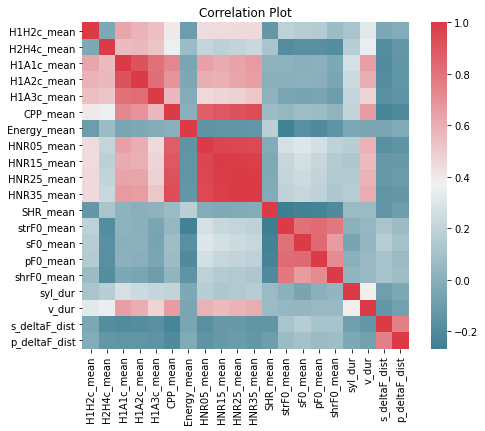

In [38]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [39]:
columns_to_scale = list(scale_subset.columns)
columns_to_scale.remove('partID')
columns_to_scale

['H1H2c_mean',
 'H2H4c_mean',
 'H1A1c_mean',
 'H1A2c_mean',
 'H1A3c_mean',
 'CPP_mean',
 'Energy_mean',
 'HNR05_mean',
 'HNR15_mean',
 'HNR25_mean',
 'HNR35_mean',
 'SHR_mean',
 'strF0_mean',
 'sF0_mean',
 'pF0_mean',
 'shrF0_mean',
 'syl_dur',
 'v_dur',
 's_deltaF_dist',
 'p_deltaF_dist']

In [40]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import  StandardScaler 
column_trans = ColumnTransformer(
    [('scaler', StandardScaler(),columns_to_scale)],
      remainder='passthrough')

In [41]:
scale_subset.head()

,H1H2c_mean,H2H4c_mean,H1A1c_mean,H1A2c_mean,H1A3c_mean,CPP_mean,Energy_mean,HNR05_mean,HNR15_mean,HNR25_mean,...,SHR_mean,strF0_mean,sF0_mean,pF0_mean,shrF0_mean,partID,syl_dur,v_dur,s_deltaF_dist,p_deltaF_dist
0,0.000,0.000,0.000,0.000,0.000,0.000,2.027,0.000,0.000,0.000,...,0.689,214.879,214.724,215.169,215.573,afs116,0.145897,0.071737,0.512598,0.486584
1,8.178,-7.852,22.533,4.996,7.536,22.885,9.773,38.283,27.609,28.908,...,0.069,256.735,255.060,249.018,250.642,afs116,0.369100,0.274665,0.282309,0.449074
2,0.926,-0.275,21.573,10.235,-14.295,23.386,1.525,38.794,41.579,47.213,...,0.000,209.019,208.756,209.094,208.054,afs116,0.220000,0.114457,0.507155,0.911324
3,7.587,-3.805,23.928,8.507,7.348,22.635,6.205,40.017,31.012,32.570,...,0.110,264.008,263.577,257.407,260.936,afs116,0.550000,0.300000,0.252006,0.421455
4,5.218,-4.662,15.659,13.086,-10.113,24.928,1.563,46.984,48.124,54.370,...,0.429,215.571,215.483,215.614,216.376,afs116,0.333645,0.198018,0.485937,0.923083


In [42]:
scaled_dfs = []
for p in scale_subset.partID.unique():
    test_df = scale_subset[scale_subset['partID']==p].copy()
    test_df.drop(['partID'], axis = 1, inplace = True)
    test_scaled = pd.DataFrame(column_trans.fit_transform(test_df), columns = columns_to_scale)
    scaled_dfs.append(test_scaled)

ready_for_pca = pd.concat(scaled_dfs)
ready_for_pca.to_numpy()

array([[-0.27234526, -0.16601499, -1.30995931, ..., -0.72461931,
         0.28477405,  0.62892937],
       [ 1.37480321, -1.51724946,  1.14776577, ...,  1.94004265,
        -0.51937996,  0.44594843],
       [-0.08583762, -0.21333917,  1.04305641, ..., -0.16366427,
         0.26576976,  2.70086781],
       ...,
       [ 0.43236061, -0.71448037, -0.7795682 , ..., -0.06110433,
         0.19371523,  0.53770638],
       [ 0.43236061, -0.71448037, -0.7795682 , ..., -0.90940004,
         1.12739507,  1.97712518],
       [-2.00983111,  2.77284908,  1.64649541, ...,  0.52325859,
         0.59974798,  0.86446615]])

In [43]:
ready_for_pca = ready_for_pca.astype(float)

Check if dataset meets statistical assumptions appropriate for PCA -- Bartlett's Test should return a significant p-value (<0.05) and the KMO Test should return a value greater than 0.6

In [44]:
# Bartlett's Test, prints the chi square value and associated p-value
fa.calculate_bartlett_sphericity(ready_for_pca)

(655486.2398671575, 0.0)

In [45]:
fa.calculate_kmo(ready_for_pca)[1] # index of 1 returns the overall KMO value

C:\Users\atarv\Anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8372865997884675

Project the data onto as many principal components needed to explain 90% of the variance.

In [46]:
from sklearn.decomposition import PCA
pca_spectilt = PCA(0.9)
principalComponents_spectilt = pca_spectilt.fit_transform(ready_for_pca)
print("number of components: ", principalComponents_spectilt.shape[1])

number of components:  9


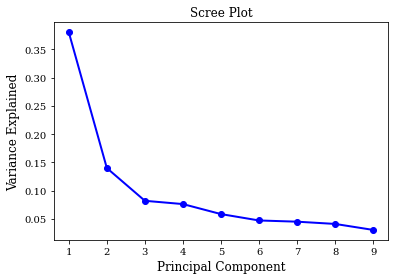

In [47]:
PC_values = np.arange(pca_spectilt.n_components_) + 1
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)
plt.figure(figsize=(6,4))
plt.plot(PC_values, pca_spectilt.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig('figures/scree_spectilt.jpg', format='jpg', dpi = 800)
plt.show()

Three components will be used, following the elbow method.

In [48]:
pca_spectilt = PCA(n_components = 3)
principalComponents_spectilt = pca_spectilt.fit_transform(ready_for_pca)

In [49]:
principal_spectilt_df = pd.DataFrame(data = principalComponents_spectilt,
                                columns = ['dur_period', 'low_f0', 'vowel_periph'])
print('Explained variation per principal component: {}'.format(pca_spectilt.explained_variance_ratio_))

Explained variation per principal component: [0.38049542 0.14004883 0.08207832]


In [50]:
# join with larger data set
df_pca = principal_spectilt_df.join(df)
df_pca.head()

,dur_period,low_f0,vowel_periph,Filename,Label,H1H2c_mean,H2H4c_mean,H1A1c_mean,H1A2c_mean,H1A3c_mean,...,partID,Language,t1_wd,t2_wd,word,stress,syl_dur,v_dur,s_deltaF_dist,p_deltaF_dist
0,-3.420603,-0.796482,-0.372169,afs116_catala_exp2_a.mat,i,0.000,0.000,0.000,0.000,0.000,...,afs116,cat,5.502012,6.2491,eliminar,0,0.145897,0.071737,0.512598,0.486584
1,2.267599,-3.084542,-0.289058,afs116_catala_exp2_a.mat,a,8.178,-7.852,22.533,4.996,7.536,...,afs116,cat,5.502012,6.2491,eliminar,1,0.369100,0.274665,0.282309,0.449074
2,1.638459,-1.795740,2.773789,afs116_catala_exp2_a.mat,i,0.926,-0.275,21.573,10.235,-14.295,...,afs116,cat,10.850600,12.0906,discriminar,0,0.220000,0.114457,0.507155,0.911324
3,2.961627,-3.107273,-0.508050,afs116_catala_exp2_a.mat,a,7.587,-3.805,23.928,8.507,7.348,...,afs116,cat,10.850600,12.0906,discriminar,1,0.550000,0.300000,0.252006,0.421455
4,2.764183,-1.954304,2.762350,afs116_catala_exp2_a.mat,i,5.218,-4.662,15.659,13.086,-10.113,...,afs116,cat,40.617489,42.1002,encaminar,0,0.333645,0.198018,0.485937,0.923083


In [51]:
loadings = pca_spectilt.components_.T * np.sqrt(pca_spectilt.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['duration_periodicity', 'low_f0', 'vowel_peripherality'], index=for_later.columns)
loading_matrix

,duration_periodicity,low_f0,vowel_peripherality
H1H2c_mean,0.526547,-0.147279,0.095705
H2H4c_mean,0.466081,0.266776,-0.134433
H1A1c_mean,0.871913,0.093504,-0.001876
H1A2c_mean,0.856739,0.081973,-0.021896
H1A3c_mean,0.718299,0.145411,-0.043102
CPP_mean,0.937256,0.031930,0.079329
Energy_mean,0.078662,-0.172652,-0.206694
HNR05_mean,0.916565,-0.079204,0.096593
HNR15_mean,0.898298,-0.083337,0.174157
HNR25_mean,0.915579,-0.075708,0.182847


For ease of interpretation, multiply the second component by -1 so that it corresponds directly to pitch.

In [52]:
df_pca['f0'] = -1*df_pca['low_f0']

In [53]:
df_pca.columns

Index(['dur_period', 'low_f0', 'vowel_periph', 'Filename', 'Label',
       'H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean',
       'CPP_mean', 'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean',
       'HNR35_mean', 'SHR_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean',
       'shrF0_mean', 'partID', 'Language', 't1_wd', 't2_wd', 'word', 'stress',
       'syl_dur', 'v_dur', 's_deltaF_dist', 'p_deltaF_dist', 'f0'],
      dtype='object')

In [54]:
df_pca.drop(['H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean',
            'H1A3c_mean', 'CPP_mean', 'Energy_mean', 'HNR05_mean',
             'HNR15_mean', 'HNR25_mean', 'HNR35_mean', 'SHR_mean',
             'strF0_mean', 'sF0_mean', 'pF0_mean', 'shrF0_mean',
             'strF0_mean', 'syl_dur', 'v_dur', 's_deltaF_dist', 'p_deltaF_dist', 'low_f0'],
            axis = 1, inplace = True)

In [55]:
df_pca.to_csv("data/data_bigPCA.csv", index = False)

In [56]:
df_pca.groupby(['Language']).count()/2

,dur_period,vowel_periph,Filename,Label,partID,t1_wd,t2_wd,word,stress,f0
Language,,,,,,,,,,
cat,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0
eng,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0
spa,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0


In [57]:
len(df_pca)/2

13988.0

# Prepare for logreg in R

In [58]:
df = pd.read_csv("data/data_bigPCA.csv")

In [59]:
df['syllable'] = np.where((df['Label']=="i") | (df['Label']=="pen"), 'pen', 'ult')

In [60]:
parts = pd.read_csv("../blp/data/parts.csv")
parts['partID'] = parts['partID'].map(str.lower)

In [61]:
df_lang = pd.merge(df, parts, on = "partID", how = "left")
df_lang.head()

,dur_period,vowel_periph,Filename,Label,partID,Language,t1_wd,t2_wd,word,stress,f0,syllable,lang_profile
0,-3.420603,-0.372169,afs116_catala_exp2_a.mat,i,afs116,cat,5.502012,6.2491,eliminar,0,0.796482,pen,l1_eng
1,2.267599,-0.289058,afs116_catala_exp2_a.mat,a,afs116,cat,5.502012,6.2491,eliminar,1,3.084542,ult,l1_eng
2,1.638459,2.773789,afs116_catala_exp2_a.mat,i,afs116,cat,10.850600,12.0906,discriminar,0,1.795740,pen,l1_eng
3,2.961627,-0.508050,afs116_catala_exp2_a.mat,a,afs116,cat,10.850600,12.0906,discriminar,1,3.107273,ult,l1_eng
4,2.764183,2.762350,afs116_catala_exp2_a.mat,i,afs116,cat,40.617489,42.1002,encaminar,0,1.954304,pen,l1_eng


In [62]:
blp_pca = pd.read_csv("../blp/data/pca_blp.csv")
blp_pca.drop(['lang_profile'], axis = 1, inplace = True)
df_blp = pd.merge(df_lang, blp_pca, on="partID", how = "left")

In [63]:
df_blp.drop(['Filename', 't1_wd', 't2_wd'], axis = 1, inplace = True)

In [64]:
df_blp.to_csv("data/big_PCA_forR.csv", index = False)